# Suport Vector Machine on UniversalBank CreditCard Aproval

#### Created by: Polin Tsenova

A credit card lets creditcard holder spend money on credit – it’s like having a loan for the amount creditcard holder spend using the card. Creditcard holder can spend up to a pre-set credit limit, which might be a few hundred or several thousands of pounds. But being approved for credit is a complicated task, a creditcard borrower should pass a set of criteria. This notebook explores accounts and using Suport Vector Machine algoritm it tries to predict if a Bank will issuе a card or not.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Import Data

In [2]:
bankdata = pd.read_csv('UniversalBank.csv')

In [3]:
bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Source Information Details

Data Source is publically available on Kaggle.


* ID -Customer ID 
* Age- Customer's age in completed years 
* Experience - #years of professional experience 
* Income - Annual income of the customer 
* ZIPCode -	Home Address ZIP code. 
* Family - Family size of the customer 
* CCAvg - Avg. spending on credit cards per month 
* Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 
* Mortgage - Value of house mortgage if any
* Personal Loan - Did this customer accept the personal loan offered in the last campaign? (Target attribute) 
* Securities Account - Does the customer have a securities account with the bank? 
* CD Account - Does the customer have a certificate of deposit (CD) account with the bank? 
* Online- Does the customer use internet banking facilities? 
* CreditCard- Does the customer use a credit card issued by UniversalBank? 


### Initial Data Exploration

In [4]:
bankdata.shape

(5000, 14)

In [5]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
bankdata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Clean Data 

In [7]:
## Remove columns which will not be used in the research
bankdata.drop(['ZIP Code'],axis=1,inplace=True)
bankdata.drop(['ID'],axis=1,inplace=True)

In [8]:
bankdata.shape

(5000, 12)

### Data Analysis and Visualisation

In [9]:
bankdata['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

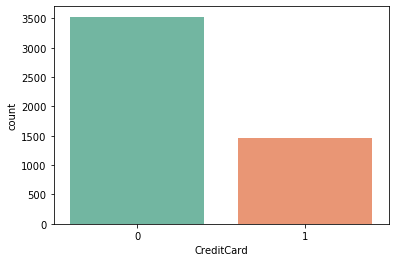

In [10]:
sns.countplot(x='CreditCard', data=bankdata, palette='Set2')
plt.show()

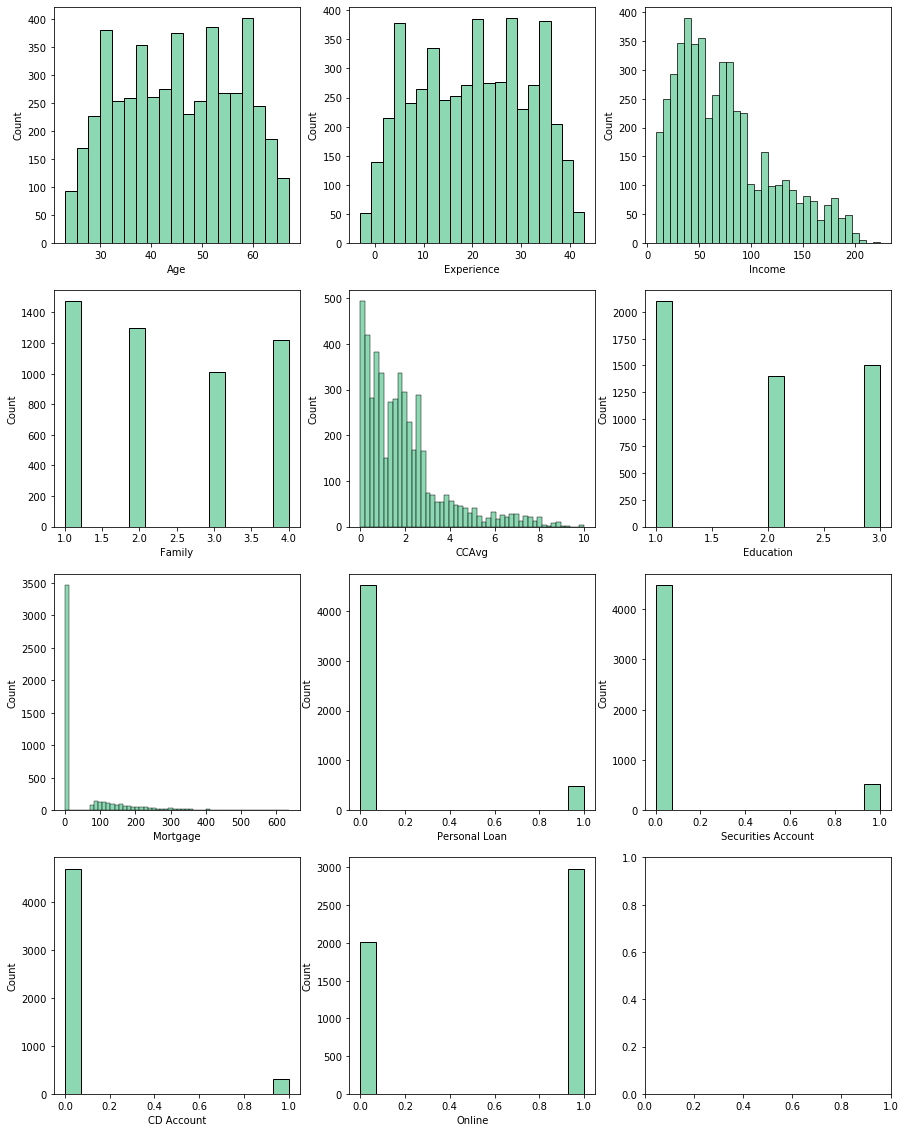

In [11]:
dims = (15, 20)
rows = 4
cols = 3
fig, ax = plt.subplots(rows,cols,figsize=dims)

data_columns = bankdata.loc[:,'Age':'Online']

index0 = 0
index1 = 0
for i in data_columns.columns:
    sns.histplot(bankdata[i], ax = ax[index0,index1],color='#66CC99')
    if index1 == cols - 1:
        index0 += 1
        index1 = 0
    else:
        index1 += 1
  

### Modeling

In [12]:
# Select variavles
x = bankdata.iloc[:, :-1].values
y = bankdata['CreditCard'].values

In [13]:
# Feature Scaling
sc = StandardScaler()
x = sc.fit_transform(x)

In [14]:
# Splitting the Data into Train and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [15]:
# Create a model
svm_model = SVC(kernel='linear',random_state=None)

In [16]:
# Fitting the model
svm_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
svm_model.support_vectors_

array([[-1.1637042 , -1.05562082, -0.19062278, ..., -0.34142334,
        -0.25354028,  0.82195086],
       [ 1.366391  ,  1.3862098 , -1.10308852, ..., -0.34142334,
        -0.25354028, -1.21661774],
       [-1.1637042 , -1.05562082,  0.11353246, ..., -0.34142334,
        -0.25354028, -1.21661774],
       ...,
       [-0.20401292, -0.09633022,  0.8521952 , ..., -0.34142334,
        -0.25354028, -1.21661774],
       [-1.68717218, -1.66607847, -1.08136314, ..., -0.34142334,
        -0.25354028, -1.21661774],
       [ 1.01741235,  1.12458509, -0.53822878, ...,  2.92891517,
         3.94414647,  0.82195086]])

### Evaluate the model

In [18]:
y_predict = svm_model.predict(x_test)

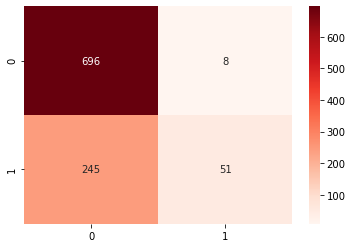

In [19]:
# Build confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.show()

In [20]:
# Checking the accuracy of the model
print("Accuracy is",accuracy_score(y_test, y_predict)*100)

Accuracy is 74.7


In [21]:
# Check for model overfiting
svm_model2 = svm_model.score(x_train, y_train)
svm_model2 * 100

74.02499999999999

In [22]:
# Report of results
report = classification_report(y_test, y_predict)
print('REPORT:', report, sep='\n')

REPORT:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.86      0.17      0.29       296

    accuracy                           0.75      1000
   macro avg       0.80      0.58      0.57      1000
weighted avg       0.78      0.75      0.68      1000



### Analysis of Results

A support vector machine model was build to predict the approval for a Credit Card in UniversalBank. According to demographic and personal indicators the average age of person having an account in the Bank is 45 years, living in a family between 1 and 4 people and receiving an income of 74 on average anually.The model was built on 5000 records 80% of which were used for training purpose or 4000 records of the total.The model correctly predicts 747 record out of 1000, 253 cases are misclassified. Based on these results different model accuracy indicatiors can be calculated. The general accuracy score proves to be 74.7% efficient in its prediction. Compared to the training accuracy of the model it can be concluded that the model is not overfitting because the difference is minimal. Another important indicator of the accuracy is the f1-score which reflects a harmonic mean of the model’s precision and recall. It is 75% so consequently there is room for improving the prediction power of the model. It is recommended to construct other binary classification models and compare the results of models evaluation indicators in order to find the best fitting model and decrease the proportion of cases which are misclassified.